In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 读取数据集
imdb_df = pd.read_csv('IMBD.csv')
douban_df = pd.read_excel('douban.xlsx')

In [7]:
# 一、比较平台之间的平均评分
print("IMDb平均评分:", imdb_df['rating'].mean())
print("豆瓣平均评分:", douban_df['评分'].mean())

IMDb平均评分: 6.764515027322403
豆瓣平均评分: 8.8872


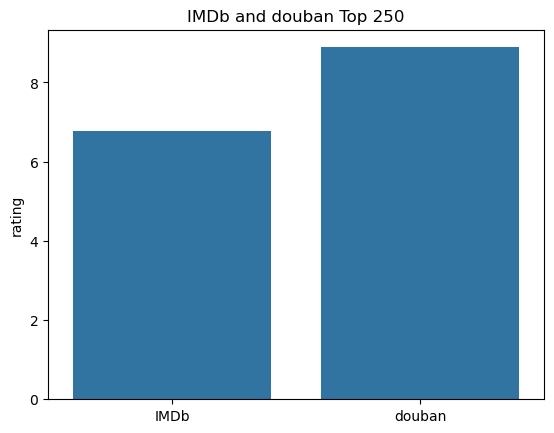

In [69]:
# 可视化平均评分
fig, ax = plt.subplots()
sns.barplot(x=['IMDb', 'douban'], y=[imdb_df['rating'].mean(), douban_df['评分'].mean()], ax=ax)
ax.set_ylabel('rating')
ax.set_title('IMDb and douban Top 250')
plt.show()

In [15]:
# 二、查找重叠 - 出现在两个列表中的电影
overlap = pd.merge(imdb_df, douban_df[['片名']], left_on='title', right_on='片名', how='inner')
print("重叠电影数量:", len(overlap))

重叠电影数量: 0


In [21]:
overlap.head(10)

,title,year,certificate,duration,genre,rating,description,stars,votes,片名


In [23]:
# 可视化重叠电影（这里以表格形式展示，也可以使用其他方式）
print(overlap[['title', 'rating', 'rating']])  # rating_x为IMDb评分，rating_y为豆瓣评分

Empty DataFrame
Columns: [title, rating, rating]
Index: []


In [27]:
imdb_df['year'][].head(10)

0       (2018– )
1       (2016– )
2    (2015–2022)
3         (2022)
4       (2022– )
5       (2022– )
6       (2013– )
7    (2008–2013)
8       (2022– )
9         (2022)
Name: year, dtype: object

In [45]:
imdb_df['year'] = imdb_df['year'].fillna('').astype(str)
 
# 定义清洁年份的函数
def clean_year(year_str):
    # 移除括号，替换非标准连字符，并处理单个年份和年份范围
    year_str = year_str.strip('()').replace('–', '-')
    start_year = year_str.split('-')[0]
    return start_year[:4] if start_year else ''  # 如果分割后为空列表，则返回空字符串
 
# 应用清洁函数到 'year' 列
imdb_df['year'] = imdb_df['year'].apply(clean_year)
 
# 打印结果查看
print(imdb_df)

                       title  year certificate duration  \
0                  Cobra Kai  2018       TV-14   30 min   
1                  The Crown  2016       TV-MA   58 min   
2           Better Call Saul  2015       TV-MA   46 min   
3              Devil in Ohio  2022       TV-MA  356 min   
4     Cyberpunk: Edgerunners  2022       TV-MA   24 min   
...                      ...   ...         ...      ...   
9952          The Imperfects  2022       TV-MA   45 min   
9953        The Walking Dead  2010       TV-MA   44 min   
9954               The Crown  2016       TV-MA   58 min   
9955            Supernatural  2005       TV-14   44 min   
9956           Devil in Ohio  2022       TV-MA  356 min   

                             genre  rating  \
0            Action, Comedy, Drama     8.5   
1        Biography, Drama, History     8.7   
2                     Crime, Drama     8.9   
3           Drama, Horror, Mystery     5.9   
4     Animation, Action, Adventure     8.6   
...            

In [47]:
# 三、分析发布年份分布
imdb_years = imdb_df['year'].value_counts().sort_index()

Text(0, 0.5, 'count')

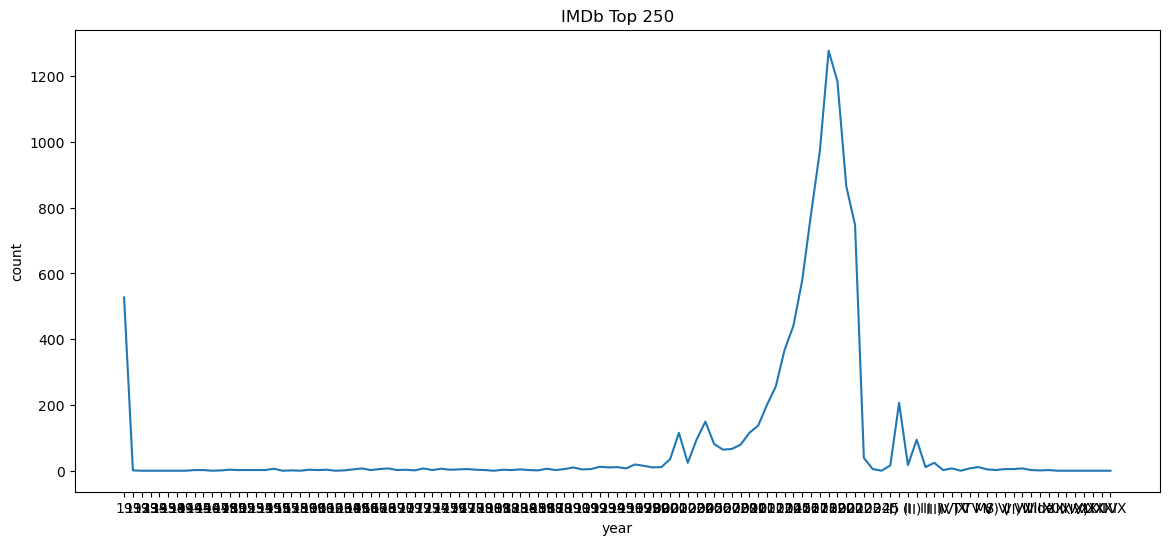

In [73]:
# 可视化发布年份分布
fig, ax1 = plt.subplots(1, figsize=(14, 6))
sns.lineplot(x=imdb_years.index, y=imdb_years.values, ax=ax1)
ax1.set_title('IMDb Top 250')
ax1.set_xlabel('year')
ax1.set_ylabel('count')

In [76]:
# 四、比较流派分布
imdb_genres = imdb_df['genre'].str.split('|').explode().value_counts()

Text(0, 0.5, 'count')

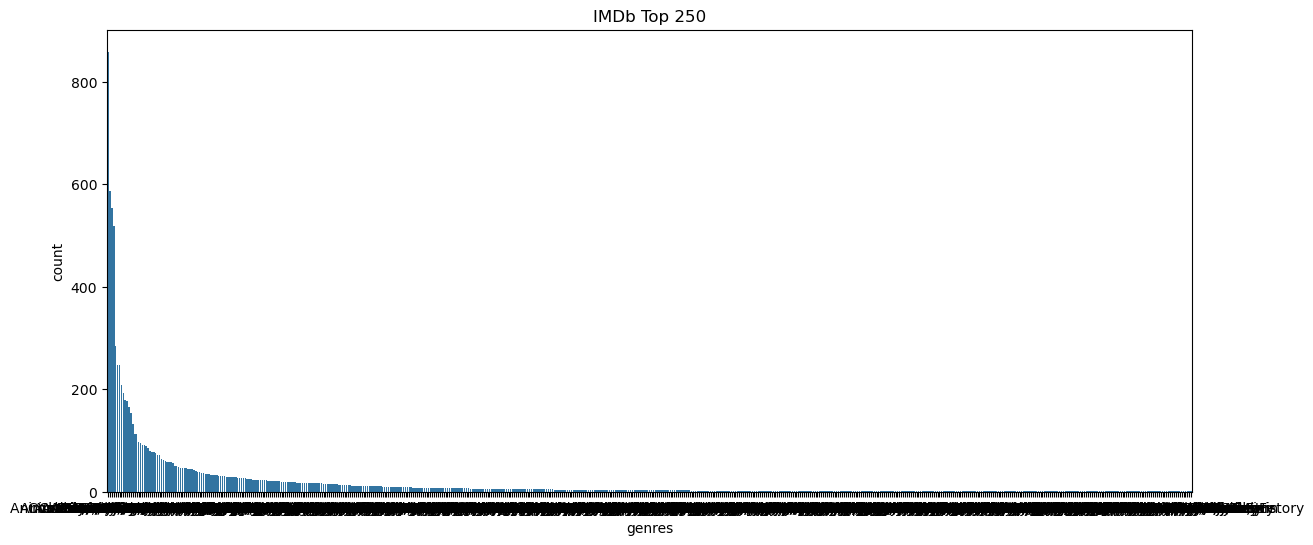

In [77]:
# 可视化流派分布
fig, ax1  = plt.subplots(1, figsize=(14, 6), sharey=True)
sns.barplot(x=imdb_genres.index, y=imdb_genres.values, ax=ax1)
ax1.set_title('IMDb Top 250')
ax1.set_xlabel('genres')
ax1.set_ylabel('count')
